# k-Means Clustering

In [176]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from datetime import datetime


## k-Means at a glance

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

# Star Wars Galaxy

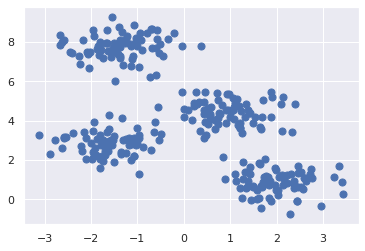

In [177]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Your code
Use  the cells below to implement Kmeans from scratch. Break down the entire problem into smaller subsets. For example, **using pseudocode**

For example: 

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 
   
In order to practice the concepts taught in the lecture by Antonio... **Try to implement it using a class**!

*Tip: Common Kmeans intialization problems have to do with the seed. Try to initiate it several times!*

## KMeans from scratch:

In [178]:
import numpy as np
from numpy.linalg import norm

class K_means:
    '''Implementation of the algorithm'''

    def __init__(self,n_cluster=4, max_iter=100, random_state=123, type="Standard"):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = 0
        self.type = type
        
    def initialize_centroids_plusplus(self, X):
        #def plus_plus(ds, k, random_state=42):
        np.random.seed(self.random_state)
        centroids = [X[0]]

        for i in range(1, self.n_cluster):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in X])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
            
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
            
            centroids.append(X[i])
        return np.array(centroids)

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_cluster]]
        return centroids
        
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_cluster, X.shape[1]))
        for k in range(self.n_cluster):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_cluster))
        for k in range(self.n_cluster):
            row_norm = norm(X - centroids[k,:], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def find_closet_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_cluster):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
      
    def fit(self, X):
        if self.type == "Standard": self.centroids = self.initialize_centroids(X)
        elif self.type == "++": self.centroids = self.initialize_centroids_plusplus(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closet_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        
    def predict(self, X):
        old_centroids = self.centroids
        distance = self.compute_distance(X, old_centroids)
        return self.find_closet_cluster(distance)

## Using KMeans from scratch:

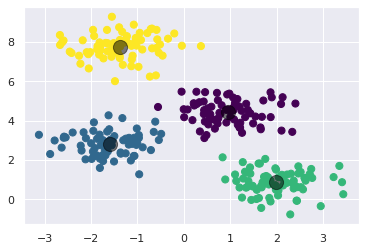

Duration: 0:00:00.232433
[[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


In [179]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=100)
k_means.fit(X)
y_kmeans = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## Using Kmeans++ :

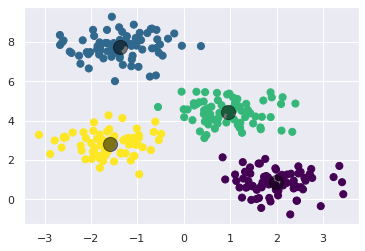

Duration: 0:00:00.222785
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


In [180]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=100, type="++")
k_means.fit(X)
y_kmeans = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

# Ideal Result
You should be able to obtain similar results as the K-means algorithm for the SkLearn library. 
- Compare how well you classify! 
- Justify why you pick X clusters, since you technically shouldn´t know the answer. 

In [181]:
from sklearn.cluster import KMeans

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

Duration: 0:00:00.072470
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


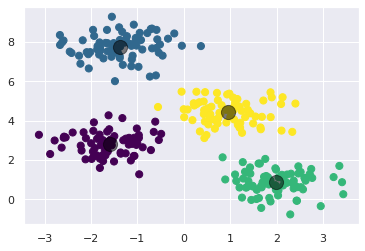

In [182]:
start_time = datetime.now()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

# BONUS Dataset: Tatooine Map
Now, time to do it for **any dimension of n_features** of X

In [183]:
# Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X, y_true = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

df= pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.506390,-0.057663,1.643606,4.426560,0.564538
1,-9.304401,7.410423,2.634051,1.421497,6.529532
2,-2.874097,2.395984,1.424139,3.999277,0.486795
3,-1.747953,0.712163,0.784197,4.408828,0.959651
4,-1.409234,8.909214,7.602814,-0.969191,2.647356
...,...,...,...,...,...
3995,-3.124214,9.833733,7.872693,-1.033497,2.852330
3996,-3.138745,9.688679,7.624227,-1.525713,3.853165
3997,-1.284945,0.625381,1.833122,4.583487,0.905785
3998,-2.542347,-0.165675,2.671166,5.036737,0.871050


# Your Code
- You can do it with Kmeans right away but...
- Can you also implement K-means ++?
- What about PCA + Kmeans?

Compute the execution time for each! 
- Which is faster? 
- Which is more accurate?

## Using KMeans :

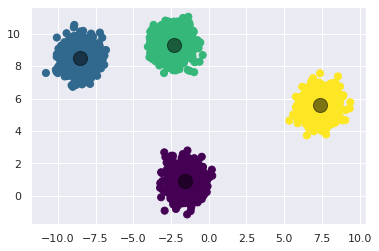

Duration: 0:00:00.292599
[[-1.56369008  0.89188882  2.03997632  4.29030639  0.9951018 ]
 [-8.56310668  8.48371073  1.37289887  0.59041155  5.83953874]
 [-2.33516784  9.29195226  7.80724118 -1.28401233  2.90403444]
 [ 7.3959297   5.57285926  6.64861867 -9.59332317 -8.21547147]]


In [185]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=600)
k_means.fit(X)
y_kmeans = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## Using KMeans++

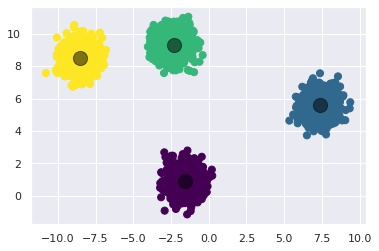

Duration: 0:00:00.430362
[[-1.56369008  0.89188882  2.03997632  4.29030639  0.9951018 ]
 [ 7.3959297   5.57285926  6.64861867 -9.59332317 -8.21547147]
 [-2.33516784  9.29195226  7.80724118 -1.28401233  2.90403444]
 [-8.56310668  8.48371073  1.37289887  0.59041155  5.83953874]]


In [186]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=100, type="++")
k_means.fit(X)
y_kmeans = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## WITH PCA AND KMEANS:

In [187]:
from sklearn.decomposition import PCA

Duration: 0:00:00.031978


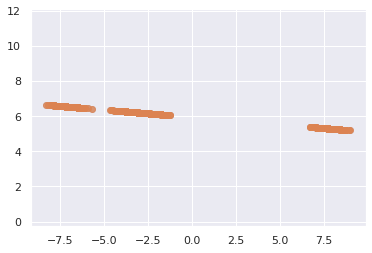

In [188]:
start_time = datetime.now()

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

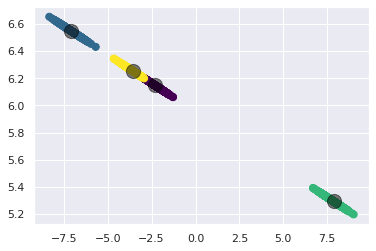

Duration: 0:00:00.311113
[[-2.31264695  6.1479767   4.1294327  -0.65763288  1.34990684]
 [-7.08983849  6.54925311  2.58709206  3.18517616  5.77533046]
 [ 7.8608805   5.29341674  7.4140079  -8.84129539 -8.07449414]
 [-3.5342024   6.25058539  3.7350473   0.32499557  2.4815132 ]]


In [189]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=600)
k_means.fit(X_new)
y_kmeans = k_means.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## With PCA and KMeans++ :

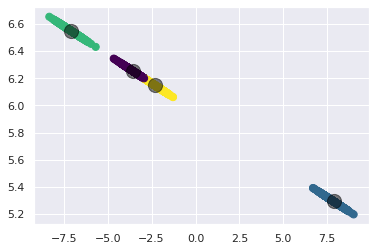

Duration: 0:00:00.416456
[[-3.53358674  6.25053368  3.73524607  0.32450033  2.48094288]
 [ 7.8608805   5.29341674  7.4140079  -8.84129539 -8.07449414]
 [-7.08983849  6.54925311  2.58709206  3.18517616  5.77533046]
 [-2.31204098  6.1479258   4.12962834 -0.65812033  1.34934549]]


In [190]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=100, type="++")
k_means.fit(X_new)
y_kmeans = k_means.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## Using PCA from scratch and KMeans:

In [191]:
def P_C_A(x, num_components):


        #mean centering, substracting the mean from every variable , in order to center the dataset to origin
    x_mean = x - np.mean(x, axis=0)


        # calculate covariance matrix of the mean-centered dataset
    cov_matrix = np.cov(x_mean, rowvar = False)

        #eigenvalues , eigenvectors

    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

        # sort eigenvalues in descending order

    sorted_values = np.argsort(eigen_values)[::-1]

    sorted_eigenvalues = eigen_values[sorted_values]

        # sort eigenvectors
    sorted_eigenvector = eigen_vectors[:,sorted_values]

        # select principl component from the eigenvalue matrix

    eigenvector_subset = sorted_eigenvector[:,0:num_components]


        # transform the data

    x_reduced = np.dot(eigenvector_subset.transpose(),x_mean.transpose()).transpose()

    return x_reduced

In [192]:
X_new_pca = P_C_A(X, 3)
print(X_new_pca)

[[ 3.44623203  8.27710658  0.33570523]
 [10.37888571 -2.2306716  -1.32243437]
 [ 4.20597723  6.00934954 -0.41574215]
 ...
 [ 3.58044397  7.76970313  0.72331423]
 [ 4.35494682  8.03306697  1.16967671]
 [ 1.98203824 -3.70037453  3.06632302]]


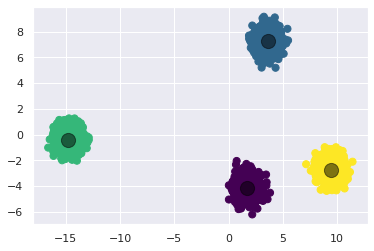

Duration: 0:00:00.284565
[[  1.71385569  -4.12382028   3.03523664]
 [  3.6306737    7.27545824   0.68643252]
 [-14.76414109  -0.42764401  -1.13252791]
 [  9.4196117   -2.72399395  -2.58914124]]


In [197]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=1000)
k_means.fit(X_new_pca)
y_kmeans = k_means.predict(X_new_pca)

plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

## With PCA from scratch and KMeans++ :

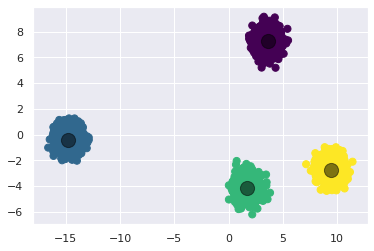

Duration: 0:00:00.581298
[[  3.6306737    7.27545824   0.68643252]
 [-14.76414109  -0.42764401  -1.13252791]
 [  1.71385569  -4.12382028   3.03523664]
 [  9.4196117   -2.72399395  -2.58914124]]


In [198]:
start_time = datetime.now()

k_means = K_means(n_cluster=4, max_iter=100, type="++")
k_means.fit(X_new_pca)
y_kmeans = k_means.predict(X_new_pca)

plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)

# Ideal Result

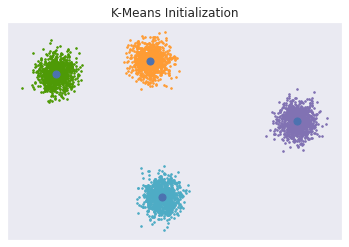

Duration: 0:00:00.204848
[[  3.6306737    7.27545824   0.68643252]
 [-14.76414109  -0.42764401  -1.13252791]
 [  1.71385569  -4.12382028   3.03523664]
 [  9.4196117   -2.72399395  -2.58914124]]


In [200]:
start_time = datetime.now()

# Calculate seeds from kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_data = kmeans.cluster_centers_
centers_init = kmeans.cluster_centers_
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    # note that this is a plot only in two dimensions
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(k_means.centroids)